# TUGAS KLASIFIKASI DATA PROYEK SAINS DATA - B

Nama  : Zalzabila Rani    
NIM   : 210411100082  
Kelas : B  

# --- BUSSINESS UNDERSTANDING ---

Tujuan = melakukan klasifikasi kanker payudara sebagai upaya deteksi terhadap penyakit kanker payudara .

Kanker payudara adalah jenis kanker yang dimulai dari sel-sel payudara. Kanker ini dapat terjadi pada wanita dan pria, meskipun kasusnya jauh lebih umum pada wanita. Sebagian besar kanker payudara bermula dari sel-sel kelenjar yang menghasilkan air susu (sel-sel lobulus) atau dari saluran susu (sel-sel duktus).

Kumpulan data berisi catatan pasien dari uji coba tahun 1984-1989 yang dilakukan oleh Kelompok Studi Kanker Payudara Jerman (GBSG) terhadap 720 pasien dengan kanker payudara nodus positif; itu mempertahankan 686 pasien dengan data lengkap untuk variabel prognostik.
Kumpulan data ini digunakan dalam makalah Royston dan Altman (2013). Data Rotterdam digunakan untuk membuat model yang sesuai, dan data GBSG untuk validasi model.

Referensi data bisa diakses [disini](https://www.kaggle.com/datasets/utkarshx27/breast-cancer-dataset-used-royston-and-altman).

# --- DATA UNDERSTANDING ---

Adapun hal - hal yang perlu dilakukan untuk memahami data, yakni
1. Mendeskripsikan setiap fitur pada data
    * tipe data
    * deskripsi data
2. Mengidentifikasi missing values setiap fitur atau kolom
3. Eksplorasi data (grafikan fitur)
4. Mengidentifikasi outlier
5. Mengidentifikasi jumlah data (proporsi data perkelas -untuk mengetahui balancing dataset atau keseimbangan data per kelas)

## Load Dataset

In [32]:
import pandas as pd

data = pd.read_csv('dataset.csv')
data.head(5)

,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,132,49,0,18,2,2,0,0,0,1838,0
1,1575,55,1,20,3,16,0,0,0,403,1
2,1140,56,1,40,3,3,0,0,0,1603,0
3,769,45,0,25,3,1,0,4,0,177,0
4,130,65,1,30,2,5,0,36,1,1855,0


In [33]:
# Rincian dataset (banyak data dan kolom)

print("Banyaknya data : ", data.shape[0])
print("Banyaknya kolom : ", data.shape[1])

Banyaknya data :  686
Banyaknya kolom :  11


## Mendeskripsikan setiap fitur

In [35]:
data.columns

Index(['pid', 'age', 'meno', 'size', 'grade', 'nodes', 'pgr', 'er', 'hormon',
       'rfstime', 'status'],
      dtype='object')

### Tipe data

Berikut Macam - Macam Data yang ada pada data ini.   

1. Tipe nominal   
    > yakni pada fitur *'pid'*
2. Tipe rentang
    > yakni pada fitur *'age', 'size', 'pgr', 'er', 'rfstime'*
3. Tipe ordinal
    > yakni pada fitur *'meno', 'grade', 'nodes', 'hormon', 'status'*

### Deskripsi data

1. `pid (patient identifier)`
   
      Ini adalah pengenal unik untuk setiap pasien. Masing-masing pasien memiliki nomor identifikasi yang berbeda.

2. `age (age, years)`

      Ini mencatat usia pasien dalam tahun. Informasi ini membantu untuk memahami distribusi usia dalam sampel.

3. `meno (menopausal status)`

      Ini mencatat status menopause pasien. Nilai 0 mewakili premenopause, sedangkan nilai 1 mewakili postmenopause.

4. `size (tumor size, mm)`

      Ukuran tumor dalam milimeter. Informasi ini membantu untuk memahami seberapa besar tumor pada pasien.

5. `grade (tumor grade)`

      Ini mencatat tingkat keparahan tumor. Nilai biasanya dalam bentuk kategori ordinal, seperti 1, 2, atau 3.

6. `nodes (number of positive lymph nodes)`

      Ini mencatat jumlah nodus limfe positif pada pasien. Nodus limfe positif dapat memberikan informasi tentang penyebaran kanker (kelenjar getah bening).

7. `pgr (progesterone receptors, fmol/l)`

      Ini mencatat kadar reseptor progesteron dalam fentomol per liter. Informasi ini berkaitan dengan reseptor hormon tertentu pada sel kanker.

8. `er (estrogen receptors, fmol/l)`

      Ini mencatat kadar reseptor estrogen dalam fentomol per liter. Informasi ini juga berkaitan dengan reseptor hormon pada sel kanker.

9. `Hormon (hormonal therapy)`

      Ini mencatat apakah pasien menjalani terapi hormonal atau tidak. Nilai 0 menunjukkan tidak, sementara nilai 1 menunjukkan ya.

10. `rfstime (recurrence free survival time; days to first of recurrence, death or last follow-up)`

      Ini mencatat waktu bertahan hidup bebas kekambuhan. Ini dapat diukur dalam jumlah hari dari saat rekurensi pertama, kematian, atau kunjungan tindak lanjut terakhir.
            
11. `status (0= alive without recurrence, 1= recurrence or death)`

      Ini mencatat status akhir pasien. Nilai 0 menunjukkan pasien masih hidup tanpa rekurensi, sedangkan nilai 1 menunjukkan rekurensi atau kematian.


## Mengidentifikasi missing value

### Missing value

In [36]:
# Menghitung apakah ada nilai yang hilang dalam setiap kolom
missing_values = data.isna().any()

# Menampilkan hasil
print("Apakah ada nilai yang hilang dalam setiap kolom:")
print(missing_values)

Apakah ada nilai yang hilang dalam setiap kolom:
pid        False
age        False
meno       False
size       False
grade      False
nodes      False
pgr        False
er         False
hormon     False
rfstime    False
status     False
dtype: bool


Noted : tidak ada *missing value* pada data

### Duplikat data

In [37]:
jumlah_duplikat = data.duplicated().sum()

# Menampilkan jumlah data yang duplikat
print("Jumlah data yang duplikat:", jumlah_duplikat)

Jumlah data yang duplikat: 0


Noted : terdapat beberapa baris data yang sama, sehingga data tersebut harus dihilangkan untuk menghindari adanya data yang redundan

## Mengidentifikasi Outlier

In [38]:
import pandas as pd
import numpy as np
from scipy import stats

# Fungsi untuk mendeteksi outlier menggunakan z-score
def detect_outliers(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    row_outliers, col_outliers = np.where(z_scores > threshold)
    return list(zip(row_outliers, col_outliers))

# Mendeteksi outlier
outliers = detect_outliers(data)
print(f"Total outlier : ", len(outliers))

Total outlier :  49


Noted : terdapat banyak data yang memiliki outlier, sehingga data tersebut harus dihilangkan

## Mengidentifikasi Jumlah Data

In [39]:
# Menghitung jumlah target pada data tanpa outlier
target_no_outliers = data['status'].value_counts()

print("Jumlah data pada tiap target :")
print(target_no_outliers)

Jumlah data pada tiap target :
0    387
1    299
Name: status, dtype: int64


## Eksplorasi Data

### Fitur beserta presentase kepentingannya

In [40]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

# memisahkan kolom fitur dan target
fitur = data.drop(columns=['status'], axis =1)
target = data['status']

# Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
k_best = SelectKBest(score_func=mutual_info_classif, k='all')  # 'all' berarti akan mempertahankan semua fitur

# Hitung skor fitur
k_best.fit(fitur, target)
scores = k_best.scores_

# Dapatkan nama fitur dari kolom data Anda
fitur_names = fitur.columns

# Tampilkan skor fitur berserta namanya
for i, (score, fitur_name) in enumerate(zip(scores, fitur_names)):
    print(f"Fitur {i}: {fitur_name}, Skor: {score}")

Fitur 0: pid, Skor: 0.04280353534468739
Fitur 1: age, Skor: 0.0
Fitur 2: meno, Skor: 0.0
Fitur 3: size, Skor: 0.01161645142972656
Fitur 4: grade, Skor: 0.0005664614103564336
Fitur 5: nodes, Skor: 0.016272698748095227
Fitur 6: pgr, Skor: 0.02638876341887686
Fitur 7: er, Skor: 0.0
Fitur 8: hormon, Skor: 0.0
Fitur 9: rfstime, Skor: 0.17124806143528248


### Grafik fitur dan tingkat pentingnya

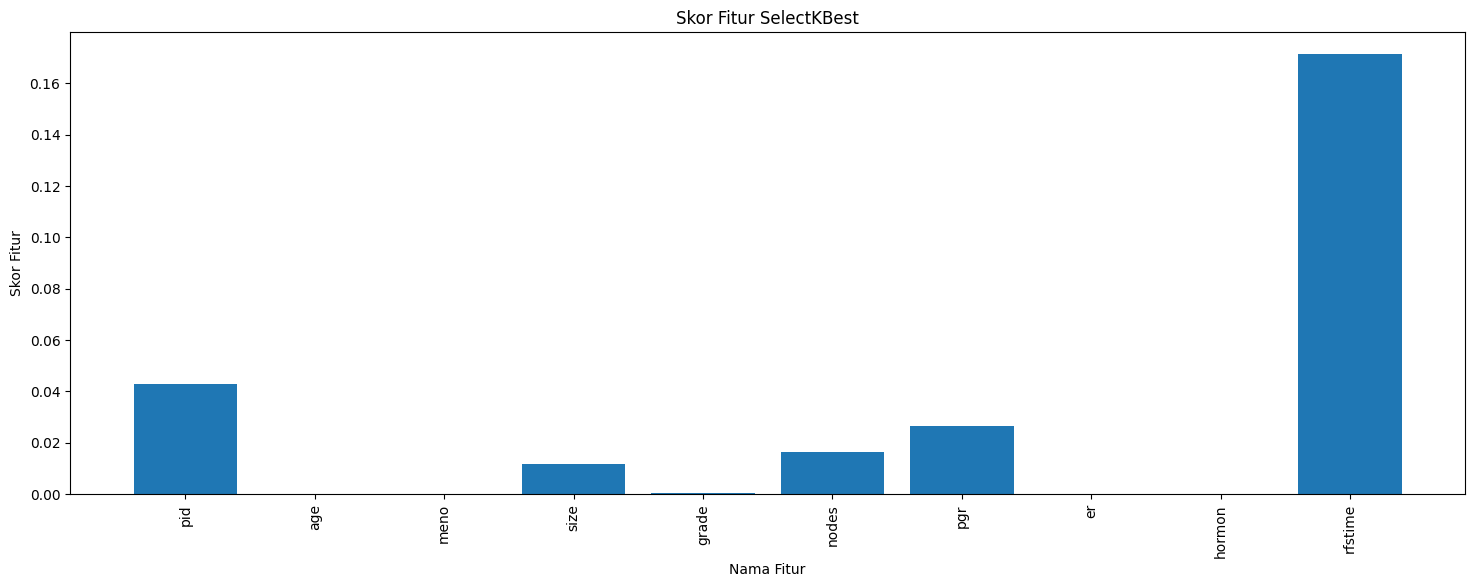

In [41]:
import matplotlib.pyplot as plt

# Tampilkan skor fitur dalam grafik
plt.figure(figsize=(18, 6))
plt.bar(fitur_names, scores)
plt.xlabel("Nama Fitur")
plt.ylabel("Skor Fitur")
plt.title("Skor Fitur SelectKBest")
plt.xticks(rotation=90)
plt.show()

**Kesimpulan :**

1. Data tidak memiliki _missing values_
2. Tidak ada data yang sama
3. Terdapat 10% outlier dari data sehingga tidak perlu dihapus
4. Perbandingan proporsi data tiap target sangat jauh sehingga untuk menghemat waktu komputasi output antar target akan diseimbangkan menggunakan metode UnderSampling. Undersampling adalah teknik untuk mengurangi jumlah data pada kelas mayoritas sehingga jumlahnya setara dengan kelas minoritas.
5. Hasil skoring fitur masih menggunakan data kotor sehingga perlu difilter kembali 

# --- DATA PREPROCESSING ---

Setelah memahami data, akan dilakukan tahap preprocessing untuk menangani masalah pada data yang sudah didefinisikan pada data understanding, yakni.
1. Menghapus Outlier
2. Menyeimbangkan proporsi data tiap target

Setelah data siap, akan dilakukan :
1. Skoring tiap fitur kembali
2. Normalisasi Data
3. Eksplorasi Model

## Load Dataset

In [45]:
import pandas as pd

data = pd.read_csv('dataset.csv')
data.head(5)

,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,132,49,0,18,2,2,0,0,0,1838,0
1,1575,55,1,20,3,16,0,0,0,403,1
2,1140,56,1,40,3,3,0,0,0,1603,0
3,769,45,0,25,3,1,0,4,0,177,0
4,130,65,1,30,2,5,0,36,1,1855,0


In [46]:
# Rincian dataset (banyak data dan kolom)

print("Banyaknya data : ", data.shape[0])
print("Banyaknya kolom : ", data.shape[1])

Banyaknya data :  686
Banyaknya kolom :  11


## Menghapus Outlier

In [47]:
data_tanpa_outlier = data.copy()
for row, col in outliers:
    if row in data_tanpa_outlier.index:
        data_tanpa_outlier = data_tanpa_outlier.drop(index=row)

print("Jumlah baris tanpa outlier : ", len(data_tanpa_outlier))

Jumlah baris tanpa outlier :  643


## Menyeimbangkan Data Tiap Target

In [50]:
fitur = data.drop(columns=['status'])
target = data['status']

target.value_counts()

0    387
1    299
Name: status, dtype: int64

Menyeimbangkan data target sesuai jumlahnya menggunakan jumlah pada target yang paling banyak

In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
fitur_seimbang, target_seimbang = smote.fit_resample(fitur, target)

print("Jumlah sampel setelah diseimbangkan : ")
print(target_seimbang.value_counts())

Jumlah sampel setelah diseimbangkan : 
0    387
1    387
Name: status, dtype: int64


simpan data yang telah seimbang di dalam database

In [52]:
import pandas as pd

# Membuat DataFrame dari fitur dan target yang telah seimbang
data_seimbang = pd.concat([fitur_seimbang, target_seimbang], axis=1)

# Menyimpan DataFrame ke dalam file CSV
data_seimbang.to_csv('data_seimbang.csv', index=False)

In [53]:
fitur = data_seimbang.drop(columns=['status'])
target = data_seimbang['status']

## Eksplorasi Data (Skoring Fitur)

In [54]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
k_best = SelectKBest(score_func=mutual_info_classif, k='all')  # 'all' berarti akan mempertahankan semua fitur

# Hitung skor fitur
k_best.fit(fitur, target)
scores = k_best.scores_

# Dapatkan nama fitur dari kolom data Anda
fitur_names = fitur.columns

# Tampilkan skor fitur berserta namanya
for i, (score, fitur_name) in enumerate(zip(scores, fitur_names)):
    print(f"Fitur {i}: {fitur_name}, Skor: {score}")

Fitur 0: pid, Skor: 0.04982519423170029
Fitur 1: age, Skor: 0.015112047999696232
Fitur 2: meno, Skor: 0.0
Fitur 3: size, Skor: 0.011701878977351754
Fitur 4: grade, Skor: 0.007812166705106982
Fitur 5: nodes, Skor: 0.008037212146390305
Fitur 6: pgr, Skor: 0.021946395350669334
Fitur 7: er, Skor: 0.0
Fitur 8: hormon, Skor: 0.04661186563152464
Fitur 9: rfstime, Skor: 0.19030840199153287


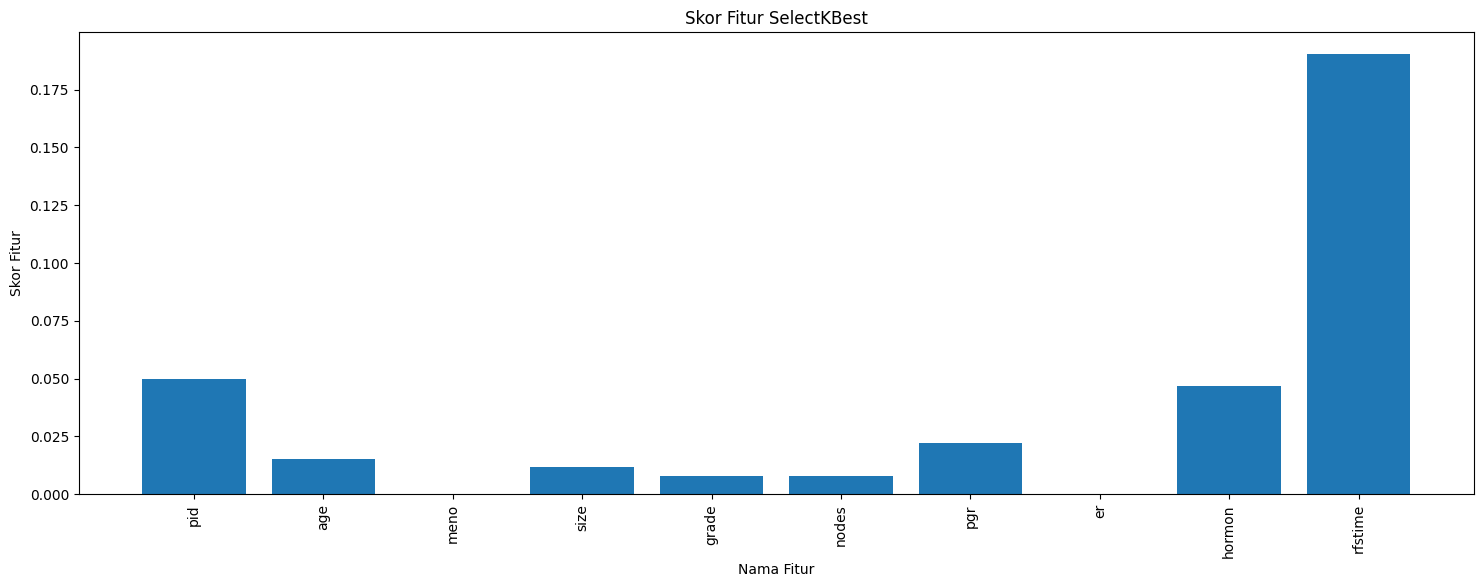

In [55]:
import matplotlib.pyplot as plt

# Tampilkan skor fitur dalam grafik
plt.figure(figsize=(18, 6))
plt.bar(fitur_names, scores)
plt.xlabel("Nama Fitur")
plt.ylabel("Skor Fitur")
plt.title("Skor Fitur SelectKBest")
plt.xticks(rotation=90)
plt.show()

## Split Data

In [56]:
from sklearn.model_selection import train_test_split

# melakukan pembagian dataset, dataset dibagi menjadi 80% data training dan 20% data testing
fitur_train, fitur_test, target_train, target_test = train_test_split(fitur, target, test_size = 0.2, random_state=42)

## Normalisasi Data

### Menggunakan Standarscaler (zscore)

In [57]:
import pickle
from sklearn.preprocessing import StandardScaler

# menentukan lokasi file pickle akan disimpan
path = 'zscore_scaler.pkl'

# membuat dan melatih objek StandardScaler
zscore_scaler = StandardScaler()
zscore_scaler.fit(fitur_train)

# menyimpan model ke dalam file pickle
with open(path, 'wb') as file:
    pickle.dump(zscore_scaler, file)

# memanggil kembali model normalisasi zscore dari file pickle
with open(path, 'rb') as file:
    zscore_scaler = pickle.load(file)

# menerapkan normalisasi zscore pada data training
zscore_training = zscore_scaler.transform(fitur_train)

# menerapkan normalisasi zscore pada data testing
zscore_testing = zscore_scaler.transform(fitur_test)

### Menggunakan Minmaxscaler

In [58]:
import pickle
from sklearn.preprocessing import MinMaxScaler

# menentukan lokasi file pickle akan disimpan
path = 'minmaxscaler.pkl'

# membuat dan melatih objek MinMaxScaler
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(fitur_train)

# menyimpan model ke dalam file pickle
with open(path, 'wb') as file:
    pickle.dump(minmaxscaler, file)

# memanggil kembali model normalisasi minmaxscaler dari file pickle
with open(path, 'rb') as file:
    minmaxscaler = pickle.load(file)

# menerapkan normalisasi zscore pada data training
minmaxtraining = minmaxscaler.transform(fitur_train)

# menerapkan normalisasi zscore pada data testing
minmaxtesting = minmaxscaler.transform(fitur_test)

## Eksplorasi Model

### Menggunakan Naive Bayes

In [59]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

best_accuracy_nb_zscore = 0
best_k_zscore = 0
best_accuracy_nb_minmax = 0
best_k_minmax = 0

for k in range(1, fitur_train.shape[1] + 1):
    # Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
    k_best = SelectKBest(score_func=mutual_info_classif, k=k)

    # Fiturkan objek SelectKBest ke data training dan testing untuk kedua normalisasi (zscore dan minmax)
    zscore_training_terbaik = k_best.fit_transform(zscore_training, target_train)
    zscore_testing_terbaik = k_best.transform(zscore_testing)
    minmaxtraining_terbaik = k_best.fit_transform(minmaxtraining, target_train)
    minmaxtesting_terbaik = k_best.transform(minmaxtesting)

    # Buat dan latih model dengan normalisasi zscore
    model_zscore = GaussianNB()
    model_zscore.fit(zscore_training_terbaik, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi zscore
    y_pred_nb_zscore = model_zscore.predict(zscore_testing_terbaik)

    # Hitung akurasi dengan normalisasi zscore
    accuracy_nb_zscore = accuracy_score(target_test, y_pred_nb_zscore)

    # Buat dan latih model dengan normalisasi minmax
    model_minmax = GaussianNB()
    model_minmax.fit(minmaxtraining_terbaik, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi minmax
    y_pred_nb_minmax = model_minmax.predict(minmaxtesting_terbaik)

    # Hitung akurasi dengan normalisasi minmax
    accuracy_nb_minmax = accuracy_score(target_test, y_pred_nb_minmax)

    # Memeriksa apakah akurasi dengan normalisasi zscore lebih baik dari yang sebelumnya
    if accuracy_nb_zscore > best_accuracy_nb_zscore:
        best_accuracy_nb_zscore = accuracy_nb_zscore
        best_k_zscore = k

    # Memeriksa apakah akurasi dengan normalisasi minmax lebih baik dari yang sebelumnya
    if accuracy_nb_minmax > best_accuracy_nb_minmax:
        best_accuracy_nb_minmax = accuracy_nb_minmax
        best_k_minmax = k

print("Dengan Normalisasi Zscore:")
print("Fitur terbaik yang bisa digunakan", best_k_zscore, "dengan akurasi : ", best_accuracy_nb_zscore)

print("Dengan Normalisasi Minmax:")
print("Fitur terbaik yang bisa digunakan", best_k_minmax, "dengan akurasi : ", best_accuracy_nb_minmax)

# Ambil indeks fitur terbaik dari SelectKBest
best_feature_indices_zscore = SelectKBest(score_func=mutual_info_classif, k=best_k_zscore).fit(zscore_training, target_train).get_support(indices=True)
best_feature_indices_minmax = SelectKBest(score_func=mutual_info_classif, k=best_k_minmax).fit(minmaxtraining, target_train).get_support(indices=True)

# Dapatkan nama fitur terbaik dari indeksnya
best_features_zscore = [fitur.columns[i] for i in best_feature_indices_zscore]
best_features_minmax = [fitur.columns[i] for i in best_feature_indices_minmax]


print("Fitur terbaik yang digunakan (dengan normalisasi Zscore):")
print(best_features_zscore)

print("Fitur terbaik yang digunakan (dengan normalisasi Minmax):")
print(best_features_minmax)

Dengan Normalisasi Zscore:
Fitur terbaik yang bisa digunakan 5 dengan akurasi :  0.7483870967741936
Dengan Normalisasi Minmax:
Fitur terbaik yang bisa digunakan 4 dengan akurasi :  0.7483870967741936
Fitur terbaik yang digunakan (dengan normalisasi Zscore):
['pid', 'grade', 'nodes', 'hormon', 'rfstime']
Fitur terbaik yang digunakan (dengan normalisasi Minmax):
['pid', 'nodes', 'pgr', 'rfstime']


### Menggunakan Random Forest

In [60]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

best_accuracy_rf_zscore = 0
best_k_zscore = 0
best_accuracy_rf_minmax = 0
best_k_minmax = 0

for k in range(1, fitur_train.shape[1] + 1):
    # Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
    k_best = SelectKBest(score_func=mutual_info_classif, k=k)

    # Fiturkan objek SelectKBest ke data training dan testing untuk kedua normalisasi (zscore dan minmax)
    zscore_training_terbaik = k_best.fit_transform(zscore_training, target_train)
    zscore_testing_terbaik = k_best.transform(zscore_testing)
    minmaxtraining_terbaik = k_best.fit_transform(minmaxtraining, target_train)
    minmaxtesting_terbaik = k_best.transform(minmaxtesting)

    # Buat dan latih model dengan normalisasi zscore
    model_zscore = RandomForestClassifier(random_state=42)
    model_zscore.fit(zscore_training_terbaik, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi zscore
    y_pred_rf_zscore = model_zscore.predict(zscore_testing_terbaik)

    # Hitung akurasi dengan normalisasi zscore
    accuracy_rf_zscore = accuracy_score(target_test, y_pred_rf_zscore)
    # print(k, "fitur menghasilkan akurasi : ", accuracy_rf_zscore)

    # Buat dan latih model dengan normalisasi minmax
    model_minmax = RandomForestClassifier(random_state=42)
    model_minmax.fit(minmaxtraining_terbaik, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi minmax
    y_pred_rf_minmax = model_minmax.predict(minmaxtesting_terbaik)

    # Hitung akurasi dengan normalisasi minmax
    accuracy_rf_minmax = accuracy_score(target_test, y_pred_rf_minmax)
    # print(k, "fitur menghasilkan akurasi : ", accuracy_rf_minmax)

    # Memeriksa apakah akurasi dengan normalisasi zscore lebih baik dari yang sebelumnya
    if accuracy_rf_zscore > best_accuracy_rf_zscore:
        best_accuracy_rf_zscore = accuracy_rf_zscore
        best_k_zscore = k

    # Memeriksa apakah akurasi dengan normalisasi minmax lebih baik dari yang sebelumnya
    if accuracy_rf_minmax > best_accuracy_rf_minmax:
        best_accuracy_rf_minmax = accuracy_rf_minmax
        best_k_minmax = k

print("Dengan Normalisasi Zscore:")
print("Fitur terbaik yang bisa digunakan", best_k_zscore, "dengan akurasi : ", best_accuracy_rf_zscore)

print("Dengan Normalisasi Minmax:")
print("Fitur terbaik yang bisa digunakan", best_k_minmax, "dengan akurasi : ", best_accuracy_rf_minmax)

# Ambil indeks fitur terbaik dari SelectKBest
best_feature_indices_zscore = SelectKBest(score_func=mutual_info_classif, k=best_k_zscore).fit(zscore_training, target_train).get_support(indices=True)
best_feature_indices_minmax = SelectKBest(score_func=mutual_info_classif, k=best_k_minmax).fit(minmaxtraining, target_train).get_support(indices=True)

# Dapatkan nama fitur terbaik dari indeksnya
best_features_zscore = [fitur.columns[i] for i in best_feature_indices_zscore]
best_features_minmax = [fitur.columns[i] for i in best_feature_indices_minmax]


print("Fitur terbaik yang digunakan (dengan normalisasi Zscore):")
print(best_features_zscore)

print("Fitur terbaik yang digunakan (dengan normalisasi Minmax):")
print(best_features_minmax)

Dengan Normalisasi Zscore:
Fitur terbaik yang bisa digunakan 8 dengan akurasi :  0.832258064516129
Dengan Normalisasi Minmax:
Fitur terbaik yang bisa digunakan 3 dengan akurasi :  0.8193548387096774
Fitur terbaik yang digunakan (dengan normalisasi Zscore):
['pid', 'size', 'grade', 'nodes', 'pgr', 'er', 'hormon', 'rfstime']
Fitur terbaik yang digunakan (dengan normalisasi Minmax):
['pid', 'nodes', 'rfstime']


### Menggunakan Decision Tree

In [61]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

best_accuracy_dct_zscore = 0
best_k_zscore = 0
best_accuracy_dct_minmax = 0
best_k_minmax = 0

for k in range(1, fitur_train.shape[1] + 1):
    # Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
    k_best = SelectKBest(score_func=mutual_info_classif, k=k)

    # Fiturkan objek SelectKBest ke data training dan testing untuk kedua normalisasi (zscore dan minmax)
    zscore_training_terbaik = k_best.fit_transform(zscore_training, target_train)
    zscore_testing_terbaik = k_best.transform(zscore_testing)
    minmaxtraining_terbaik = k_best.fit_transform(minmaxtraining, target_train)
    minmaxtesting_terbaik = k_best.transform(minmaxtesting)

    # Buat dan latih model dengan normalisasi zscore
    model_zscore = DecisionTreeClassifier()
    model_zscore.fit(zscore_training_terbaik, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi zscore
    y_pred_dt_zscore = model_zscore.predict(zscore_testing_terbaik)

    # Hitung akurasi dengan normalisasi zscore
    accuracy_dct_zscore = accuracy_score(target_test, y_pred_dt_zscore)
    # print(k, "fitur menghasilkan akurasi : ", accuracy_dct_zscore)

    # Buat dan latih model dengan normalisasi minmax
    model_minmax = DecisionTreeClassifier()
    model_minmax.fit(minmaxtraining_terbaik, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi minmax
    y_pred_dt_minmax = model_minmax.predict(minmaxtesting_terbaik)

    # Hitung akurasi dengan normalisasi minmax
    accuracy_dct_minmax = accuracy_score(target_test, y_pred_dt_minmax)
    # print(k, "fitur menghasilkan akurasi : ", accuracy_dct_minmax)

    # Memeriksa apakah akurasi dengan normalisasi zscore lebih baik dari yang sebelumnya
    if accuracy_dct_zscore > best_accuracy_dct_zscore:
        best_accuracy_dct_zscore = accuracy_dct_zscore
        best_k_zscore = k

    # Memeriksa apakah akurasi dengan normalisasi minmax lebih baik dari yang sebelumnya
    if accuracy_dct_minmax > best_accuracy_dct_minmax:
        best_accuracy_dct_minmax = accuracy_dct_minmax
        best_k_minmax = k

print("Dengan Normalisasi Zscore:")
print("Fitur terbaik yang bisa digunakan", best_k_zscore, "dengan akurasi : ", best_accuracy_dct_zscore)

print("Dengan Normalisasi Minmax:")
print("Fitur terbaik yang bisa digunakan", best_k_minmax, "dengan akurasi : ", best_accuracy_dct_minmax)

# Ambil indeks fitur terbaik dari SelectKBest
best_feature_indices_zscore = SelectKBest(score_func=mutual_info_classif, k=best_k_zscore).fit(zscore_training, target_train).get_support(indices=True)
best_feature_indices_minmax = SelectKBest(score_func=mutual_info_classif, k=best_k_minmax).fit(minmaxtraining, target_train).get_support(indices=True)

# Dapatkan nama fitur terbaik dari indeksnya
best_features_zscore = [fitur.columns[i] for i in best_feature_indices_zscore]
best_features_minmax = [fitur.columns[i] for i in best_feature_indices_minmax]


print("Fitur terbaik yang digunakan (dengan normalisasi Zscore):")
print(best_features_zscore)

print("Fitur terbaik yang digunakan (dengan normalisasi Minmax):")
print(best_features_minmax)

Dengan Normalisasi Zscore:
Fitur terbaik yang bisa digunakan 3 dengan akurasi :  0.8064516129032258
Dengan Normalisasi Minmax:
Fitur terbaik yang bisa digunakan 2 dengan akurasi :  0.8387096774193549
Fitur terbaik yang digunakan (dengan normalisasi Zscore):
['nodes', 'hormon', 'rfstime']
Fitur terbaik yang digunakan (dengan normalisasi Minmax):
['grade', 'rfstime']


### Menggunakan Support Vector Machine

In [62]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

best_accuracy_svm_zscore = 0
best_k_zscore = 0
best_accuracy_svm_minmax = 0
best_k_minmax = 0

for k in range(1, fitur_train.shape[1] + 1):
    # Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
    k_best = SelectKBest(score_func=mutual_info_classif, k=k)

    # Fiturkan objek SelectKBest ke data training dan testing untuk kedua normalisasi (zscore dan minmax)
    zscore_training_terbaik = k_best.fit_transform(zscore_training, target_train)
    zscore_testing_terbaik = k_best.transform(zscore_testing)
    minmaxtraining_terbaik = k_best.fit_transform(minmaxtraining, target_train)
    minmaxtesting_terbaik = k_best.transform(minmaxtesting)

    # Buat dan latih model dengan normalisasi zscore
    model_zscore = SVC()
    model_zscore.fit(zscore_training_terbaik, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi zscore
    y_pred_svm_zscore = model_zscore.predict(zscore_testing_terbaik)

    # Hitung akurasi dengan normalisasi zscore
    accuracy_svm_zscore = accuracy_score(target_test, y_pred_svm_zscore)
    # print(k, "fitur menghasilkan akurasi : ", accuracy_svm_zscore)

    # Buat dan latih model dengan normalisasi minmax
    model_minmax = SVC()
    model_minmax.fit(minmaxtraining_terbaik, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi minmax
    y_pred_svm_minmax = model_minmax.predict(minmaxtesting_terbaik)

    # Hitung akurasi dengan normalisasi minmax
    accuracy_svm_minmax = accuracy_score(target_test, y_pred_svm_minmax)
    # print(k, "fitur menghasilkan akurasi : ", accuracy_svm_minmax)

    # Memeriksa apakah akurasi dengan normalisasi zscore lebih baik dari yang sebelumnya
    if accuracy_svm_zscore > best_accuracy_svm_zscore:
        best_accuracy_svm_zscore = accuracy_svm_zscore
        best_k_zscore = k

    # Memeriksa apakah akurasi dengan normalisasi minmax lebih baik dari yang sebelumnya
    if accuracy_svm_minmax > best_accuracy_svm_minmax:
        best_accuracy_svm_minmax = accuracy_svm_minmax
        best_k_minmax = k

print("Dengan Normalisasi Zscore:")
print("Fitur terbaik yang bisa digunakan", best_k_zscore, "dengan akurasi : ", best_accuracy_svm_zscore)

print("Dengan Normalisasi Minmax:")
print("Fitur terbaik yang bisa digunakan", best_k_minmax, "dengan akurasi : ", best_accuracy_svm_minmax)

# Ambil indeks fitur terbaik dari SelectKBest
best_feature_indices_zscore = SelectKBest(score_func=mutual_info_classif, k=best_k_zscore).fit(zscore_training, target_train).get_support(indices=True)
best_feature_indices_minmax = SelectKBest(score_func=mutual_info_classif, k=best_k_minmax).fit(minmaxtraining, target_train).get_support(indices=True)

# Dapatkan nama fitur terbaik dari indeksnya
best_features_zscore = [fitur.columns[i] for i in best_feature_indices_zscore]
best_features_minmax = [fitur.columns[i] for i in best_feature_indices_minmax]


print("Fitur terbaik yang digunakan (dengan normalisasi Zscore):")
print(best_features_zscore)

print("Fitur terbaik yang digunakan (dengan normalisasi Minmax):")
print(best_features_minmax)

Dengan Normalisasi Zscore:
Fitur terbaik yang bisa digunakan 8 dengan akurasi :  0.7741935483870968
Dengan Normalisasi Minmax:
Fitur terbaik yang bisa digunakan 4 dengan akurasi :  0.7870967741935484
Fitur terbaik yang digunakan (dengan normalisasi Zscore):
['pid', 'age', 'meno', 'nodes', 'pgr', 'er', 'hormon', 'rfstime']
Fitur terbaik yang digunakan (dengan normalisasi Minmax):
['pid', 'nodes', 'hormon', 'rfstime']


### Menggunakan Logistic Regression

In [63]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

best_accuracy_lr_zscore = 0
best_k_zscore = 0
best_accuracy_lr_minmax = 0
best_k_minmax = 0

for k in range(1, fitur_train.shape[1] + 1):
    # Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
    k_best = SelectKBest(score_func=mutual_info_classif, k=k)

    # Fiturkan objek SelectKBest ke data training dan testing untuk kedua normalisasi (zscore dan minmax)
    zscore_training_terbaik = k_best.fit_transform(zscore_training, target_train)
    zscore_testing_terbaik = k_best.transform(zscore_testing)
    minmaxtraining_terbaik = k_best.fit_transform(minmaxtraining, target_train)
    minmaxtesting_terbaik = k_best.transform(minmaxtesting)

    # Buat dan latih model dengan normalisasi zscore
    model_zscore = LogisticRegression()
    model_zscore.fit(zscore_training_terbaik, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi zscore
    y_pred_lr_zscore = model_zscore.predict(zscore_testing_terbaik)

    # Hitung akurasi dengan normalisasi zscore
    accuracy_lr_zscore = accuracy_score(target_test, y_pred_lr_zscore)
    # print(k, "fitur menghasilkan akurasi : ", accuracy_lr_zscore)

    # Buat dan latih model dengan normalisasi minmax
    model_minmax = LogisticRegression()
    model_minmax.fit(minmaxtraining_terbaik, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi minmax
    y_pred_lr_minmax = model_minmax.predict(minmaxtesting_terbaik)

    # Hitung akurasi dengan normalisasi minmax
    accuracy_lr_minmax = accuracy_score(target_test, y_pred_lr_minmax)
    # print(k, "fitur menghasilkan akurasi : ", accuracy_lr_minmax)

    # Memeriksa apakah akurasi dengan normalisasi zscore lebih baik dari yang sebelumnya
    if accuracy_lr_zscore > best_accuracy_lr_zscore:
        best_accuracy_lr_zscore = accuracy_lr_zscore
        best_k_zscore = k

    # Memeriksa apakah akurasi dengan normalisasi minmax lebih baik dari yang sebelumnya
    if accuracy_lr_minmax > best_accuracy_lr_minmax:
        best_accuracy_lr_minmax = accuracy_lr_minmax
        best_k_minmax = k

print("Dengan Normalisasi Zscore:")
print("Fitur terbaik yang bisa digunakan", best_k_zscore, "dengan akurasi : ", best_accuracy_lr_zscore)

print("Dengan Normalisasi Minmax:")
print("Fitur terbaik yang bisa digunakan", best_k_minmax, "dengan akurasi : ", best_accuracy_lr_minmax)

# Ambil indeks fitur terbaik dari SelectKBest
best_feature_indices_zscore = SelectKBest(score_func=mutual_info_classif, k=best_k_zscore).fit(zscore_training, target_train).get_support(indices=True)
best_feature_indices_minmax = SelectKBest(score_func=mutual_info_classif, k=best_k_minmax).fit(minmaxtraining, target_train).get_support(indices=True)

# Dapatkan nama fitur terbaik dari indeksnya
best_features_zscore = [fitur.columns[i] for i in best_feature_indices_zscore]
best_features_minmax = [fitur.columns[i] for i in best_feature_indices_minmax]


print("Fitur terbaik yang digunakan (dengan normalisasi Zscore):")
print(best_features_zscore)

print("Fitur terbaik yang digunakan (dengan normalisasi Minmax):")
print(best_features_minmax)

Dengan Normalisasi Zscore:
Fitur terbaik yang bisa digunakan 4 dengan akurasi :  0.7741935483870968
Dengan Normalisasi Minmax:
Fitur terbaik yang bisa digunakan 5 dengan akurasi :  0.7806451612903226
Fitur terbaik yang digunakan (dengan normalisasi Zscore):
['pid', 'age', 'pgr', 'rfstime']
Fitur terbaik yang digunakan (dengan normalisasi Minmax):
['pid', 'nodes', 'pgr', 'hormon', 'rfstime']


### Akurasi Tiap Model

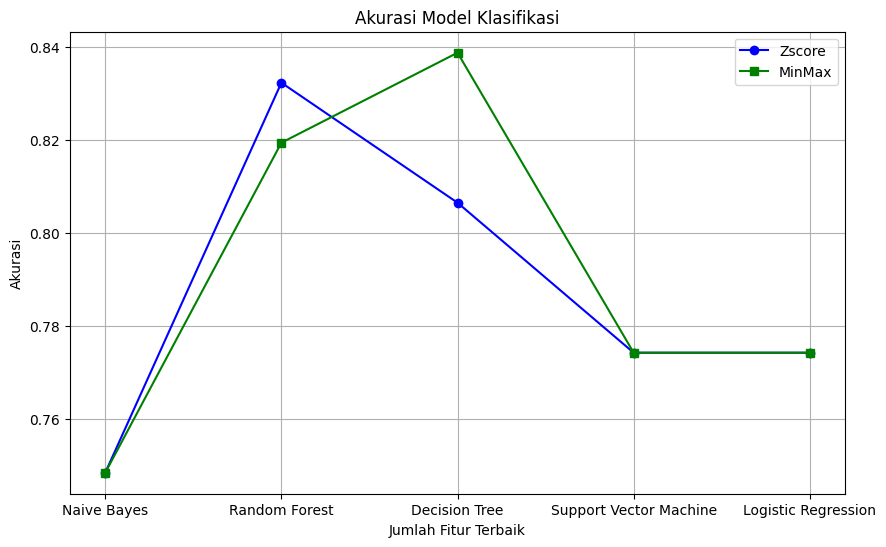

In [64]:
import matplotlib.pyplot as plt

# Data akurasi berdasarkan SelectKBest dan normalisasi Zscore
accuracy_zscore = [best_accuracy_nb_zscore, best_accuracy_rf_zscore, best_accuracy_dct_zscore, best_accuracy_svm_zscore, best_accuracy_lr_zscore]
# Data akurasi berdasarkan SelectKBest dan normalisasi MinMax
accuracy_minmax = [best_accuracy_nb_minmax, best_accuracy_rf_minmax, best_accuracy_dct_minmax, best_accuracy_svm_zscore, best_accuracy_lr_zscore]
# Nama model
models = ['Naive Bayes', 'Random Forest', 'Decision Tree', 'Support Vector Machine', 'Logistic Regression']

# Membuat grafik Line Chart untuk Akurasi Model Klasifikasi
plt.figure(figsize=(10, 6))

# Plot data akurasi untuk Zscore
plt.plot(models, accuracy_zscore, label='Zscore', marker='o', color='blue')
# Plot data akurasi untuk MinMax
plt.plot(models, accuracy_minmax, label='MinMax', marker='s', color='green')

# Konfigurasi tambahan grafik
plt.title('Akurasi Model Klasifikasi')
plt.xlabel('Jumlah Fitur Terbaik')
plt.ylabel('Akurasi')
plt.legend()
plt.grid()

# Menampilkan grafik
plt.show()

Dari hasil grafik di atas, saya memutuskan menggunakan Decision Tree dengan normalisasi zcorescaler.

Dipilih modelling menggunakan random forest dengan normalisasi  zcorescaler

# --- MODELLING ---

## Load Dataset

In [82]:
import pandas as pd

# kolom-kolom yang ingin Anda pertahankan
kolom_pilihan = ['nodes', 'hormon', 'rfstime', 'status']

# Buat dataset baru hanya dengan kolom yang dipilih
dataset_baru = data[kolom_pilihan]

# Simpan dataset baru dalam file CSV
dataset_baru.to_csv('dataset_baru_dt.csv', index=False)  # Simpan ke file CSV tanpa menyertakan indeks

In [83]:
dataset_baru.head(5)

,nodes,hormon,rfstime,status
0,2,0,1838,0
1,16,0,403,1
2,3,0,1603,0
3,1,0,177,0
4,5,1,1855,0


## Split Dataset

In [84]:
from sklearn.model_selection import train_test_split

# memisahkan kolom fitur dan target
fitur = dataset_baru.drop(columns=['status'], axis =1)
target = dataset_baru['status']

# melakukan pembagian dataset, dataset dibagi menjadi 80% data training dan 20% data testing
fitur_train, fitur_test, target_train, target_test = train_test_split(fitur, target, test_size = 0.2, random_state=42)

## Normalisasi Data

In [85]:
import pickle
from sklearn.preprocessing import StandardScaler

# menentukan lokasi file pickle akan disimpan
path = 'zcorescaler_baru.pkl'

# membuat dan melatih objek Standarscaler
zscorescaler = StandardScaler()
zscorescaler.fit(fitur_train)

# menyimpan model ke dalam file pickle
with open(path, 'wb') as file:
    pickle.dump(zscorescaler, file)

# memanggil kembali model normalisasi minmaxscaler dari file pickle
with open(path, 'rb') as file:
    zscorescaler = pickle.load(file)

# menerapkan normalisasi zscore pada data training
zscoretraining = zscorescaler.transform(fitur_train)

# menerapkan normalisasi zscore pada data testing
zscoretesting = zscorescaler.transform(fitur_test)

## Membuat model

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definisi model Decision Tree
dt = DecisionTreeClassifier()

# Definisi grid parameter yang akan diuji
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)

# Latih model dengan data latih dan mencari parameter terbaik
grid_search.fit(zscoretraining, target_train)

# Hasil parameter terbaik
best_params = grid_search.best_params_
print("Parameter terbaik:", best_params)

# Model dengan parameter terbaik
best_dt = grid_search.best_estimator_

# Evaluasi model terbaik pada data uji
accuracy = best_dt.score(zscoretesting, target_test)
print("Akurasi model terbaik:", accuracy)


Parameter terbaik: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Akurasi model terbaik: 0.5797101449275363


## Simpan Model

In [87]:
import pickle

# Model dengan parameter terbaik
best_dt = grid_search.best_estimator_

# Simpan model Decision Tree terbaik ke dalam file pickle
with open('best_dt_model.pkl', 'wb') as file:
    pickle.dump(best_dt, file)

# Evaluasi model terbaik pada data uji
accuracy = best_dt.score(zscoretesting, target_test)
print("Akurasi model terbaik:", accuracy)


Akurasi model terbaik: 0.5797101449275363


# --- EVALUATION ---

In [89]:
from sklearn.metrics import accuracy_score

with open('best_dt_model.pkl', 'rb') as file:
    model_svm = pickle.load(file)

model_svm.fit(zscoretraining, target_train)
y_pred_svm = model_svm.predict(zscoretesting)

# akurasi
akurasi_svm = accuracy_score(target_test, y_pred_svm)
print('Akurasi Support Vector Machine : ', akurasi_svm)

Akurasi Support Vector Machine :  0.5797101449275363


# --- DEPLOYMENT ---

code dilanjut pada file main.py untuk membangun sistem